# **Bagging Oza Online con datos simulados**

In [2]:
%matplotlib notebook

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skmultiflow.data import WaveformGenerator
from skmultiflow.trees import HoeffdingTree
from skmultiflow.evaluation import EvaluatePrequential
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from skmultiflow.meta import OzaBagging

In [4]:
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.data.file_stream import FileStream

In [4]:
## Simular un stream dataset

In [5]:
# 1. Crear el stream
stream = WaveformGenerator()
stream.prepare_for_use()

In [6]:
# 2 Bagging Oza  con base naives bayes 
nb=GaussianNB()
clf = OzaBagging(base_estimator=nb, n_estimators=10)
clf

OzaBagging(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
           n_estimators=10, random_state=None)

## Evaluacion Oza bagging con Naives bayes como Weak Learners

<IPython.core.display.Javascript object>


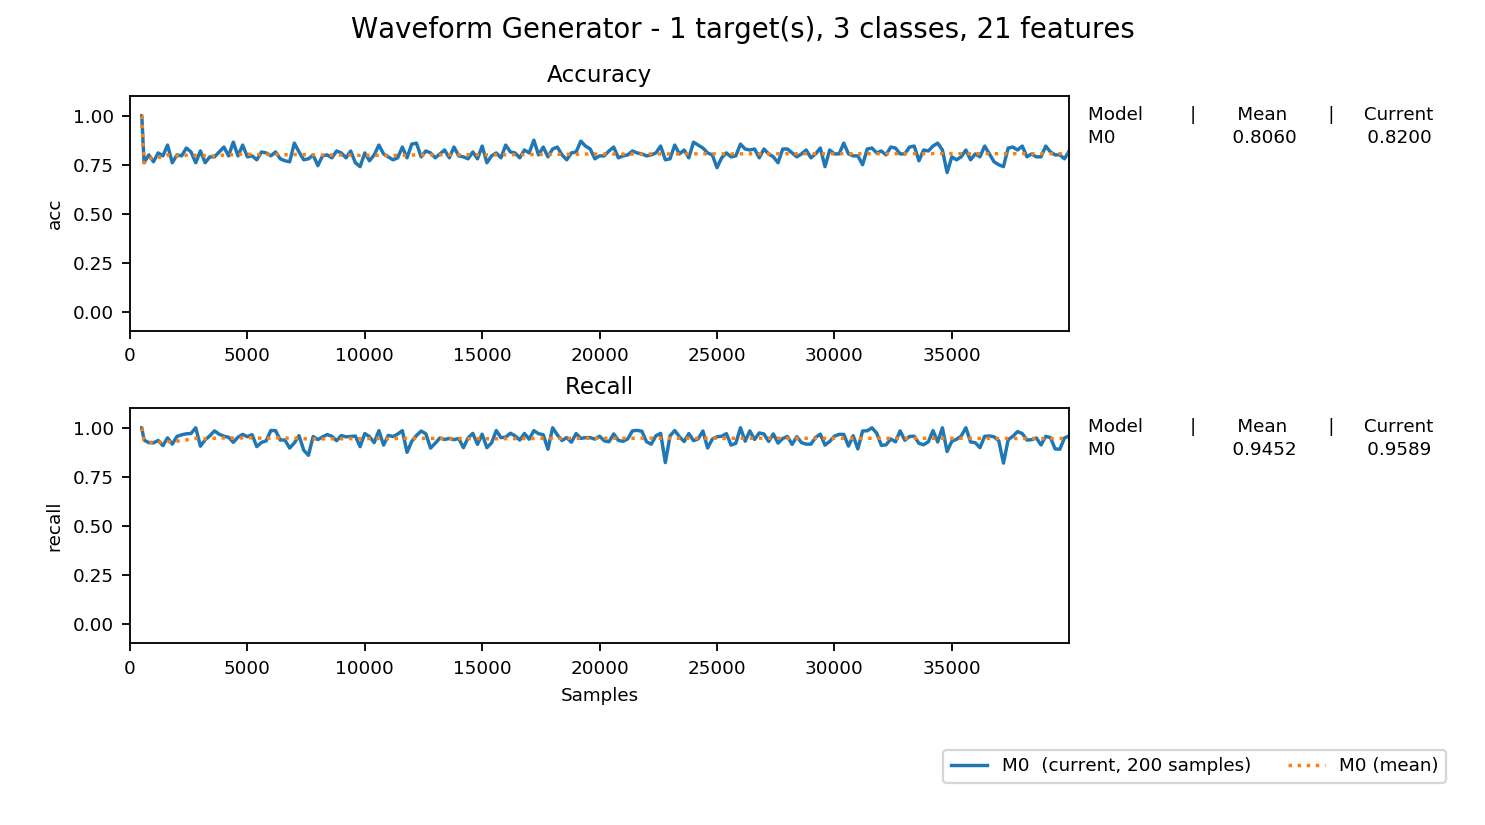

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 500 sample(s).
Evaluating...
 #################### [100%] [493.39s]
Processed samples: 40000
Mean performance:
M0 - Accuracy     : 0.8060
M0 - Recall: 0.9452


[OzaBagging(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
            n_estimators=10, random_state=None)]

In [7]:
# 3. Configurar el evaluador
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=500,
                                max_samples=40000,metrics=['accuracy', 'recall'])
# 4. Run evaluation
evaluator.evaluate(stream=stream, model=clf)

In [8]:
from skmultiflow.meta import OnlineBoosting
from skmultiflow.bayes import NaiveBayes
 # Boosting Oza  con base naives bayes 
nb=GaussianNB()
clf2 = OnlineBoosting(base_estimator=NaiveBayes(), n_estimators=10)
clf2

OnlineBoosting(base_estimator=NaiveBayes(nominal_attributes=None),
               drift_detection=True, n_estimators=None, random_state=None)

<IPython.core.display.Javascript object>


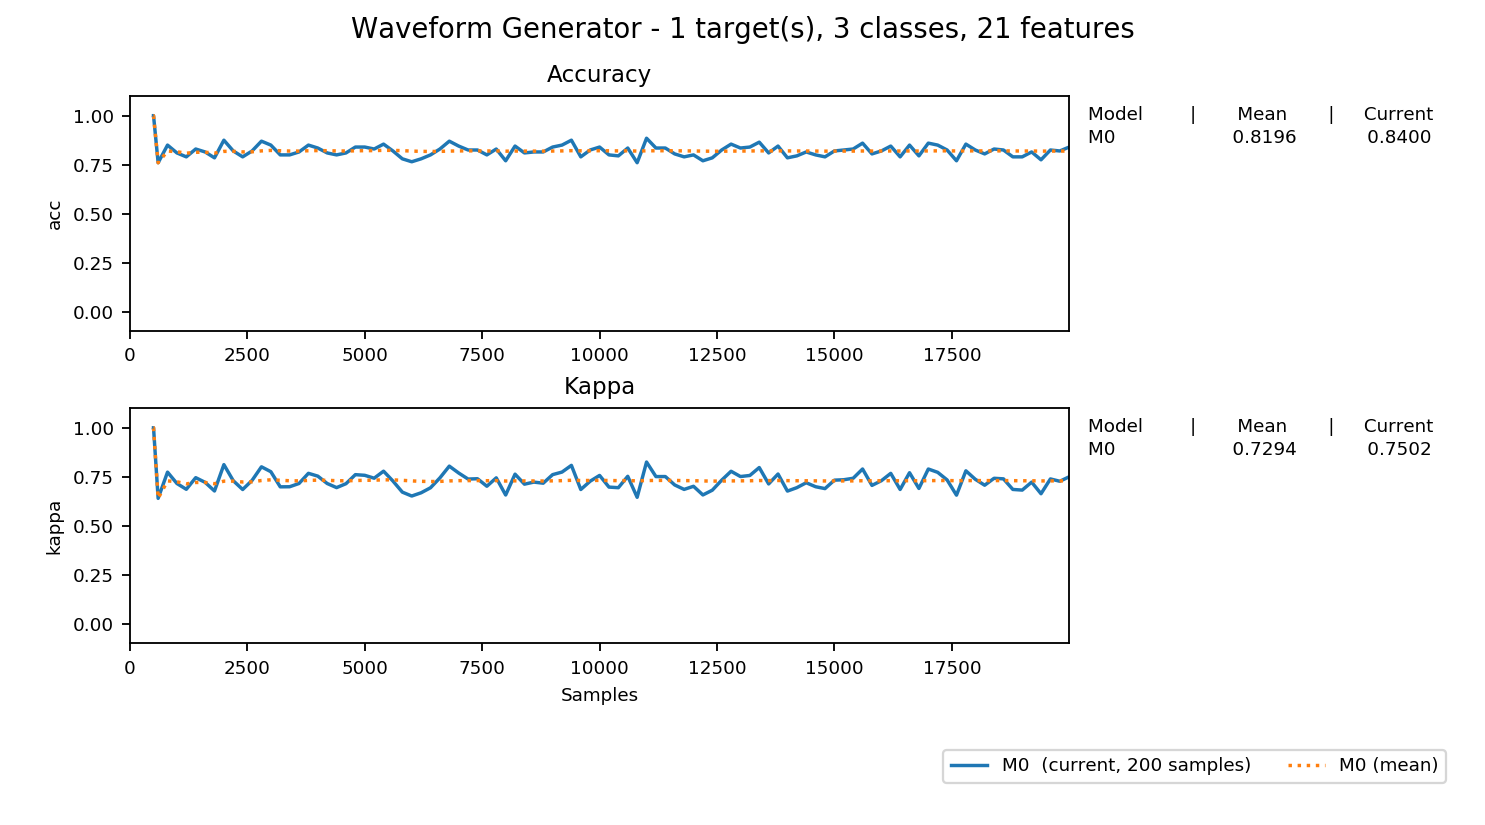

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 500 sample(s).
Evaluating...
 #################### [100%] [1704.33s]
Processed samples: 20000
Mean performance:
M0 - Accuracy     : 0.8196
M0 - Kappa        : 0.7294


[OnlineBoosting(base_estimator=NaiveBayes(nominal_attributes=None),
                drift_detection=True, n_estimators=None, random_state=None)]

In [9]:
# 3. Configurar el evaluador
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=500,
                                max_samples=20000)
# 4. Run evaluation
evaluator.evaluate(stream=stream, model=clf2)

## Importar datos desde un CSV

### Desde Skmultiflow con la funcion FileStream:

In [35]:
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.data.file_stream import FileStream

In [36]:
stream = FileStream('C:/Users/yerko/Anaconda3/pkgs/scikit-multiflow-0.4.1-py37h79cbd7a_1/Lib/site-packages/skmultiflow/data/datasets/simulados.csv', target_idx=-1)



In [37]:
stream.prepare_for_use()
# Retrieving one sample
#stream.next_sample()

# Bagging Oza  con base naives bayes weak learners

In [38]:
# Bagging Oza  con base naives bayes 
nb=GaussianNB()
clf = OzaBagging(base_estimator=nb, n_estimators=10)
clf

OzaBagging(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
           n_estimators=10, random_state=None)

<IPython.core.display.Javascript object>


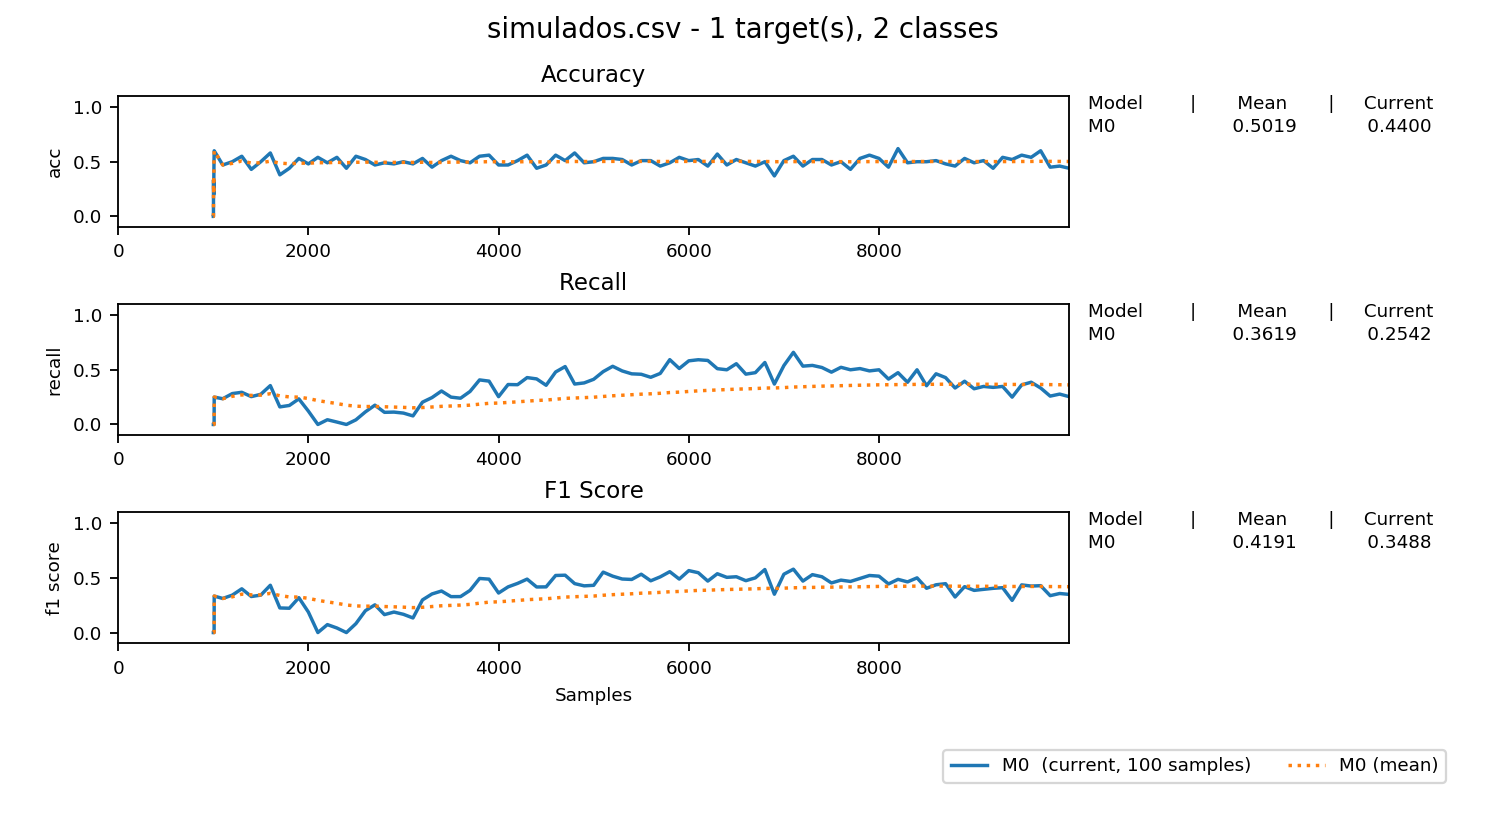

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [117.60s]
Processed samples: 10000
Mean performance:
M0 - Accuracy     : 0.5019
M0 - Recall: 0.3619
M0 - F1 score: 0.4191


[OzaBagging(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
            n_estimators=10, random_state=None)]

In [40]:
# 3. Configurar evaluador
clf = OzaBagging(base_estimator=nb, n_estimators=10)
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=1000, n_wait = 100,
                                max_samples=10000, metrics=['accuracy','recall','f1'])
# 4. Run evaluation
evaluator.evaluate(stream=stream, model=clf)


### Boosting Online con Naive Bayes como weak learner:

In [41]:
from skmultiflow.meta import OnlineBoosting

In [46]:
#  Boosting Oza  con base naives bayes 
nb1=NaiveBayes()
clf2 = OnlineBoosting(base_estimator=nb1, n_estimators=10)
clf2

OnlineBoosting(base_estimator=NaiveBayes(nominal_attributes=None),
               drift_detection=True, n_estimators=None, random_state=None)

<IPython.core.display.Javascript object>


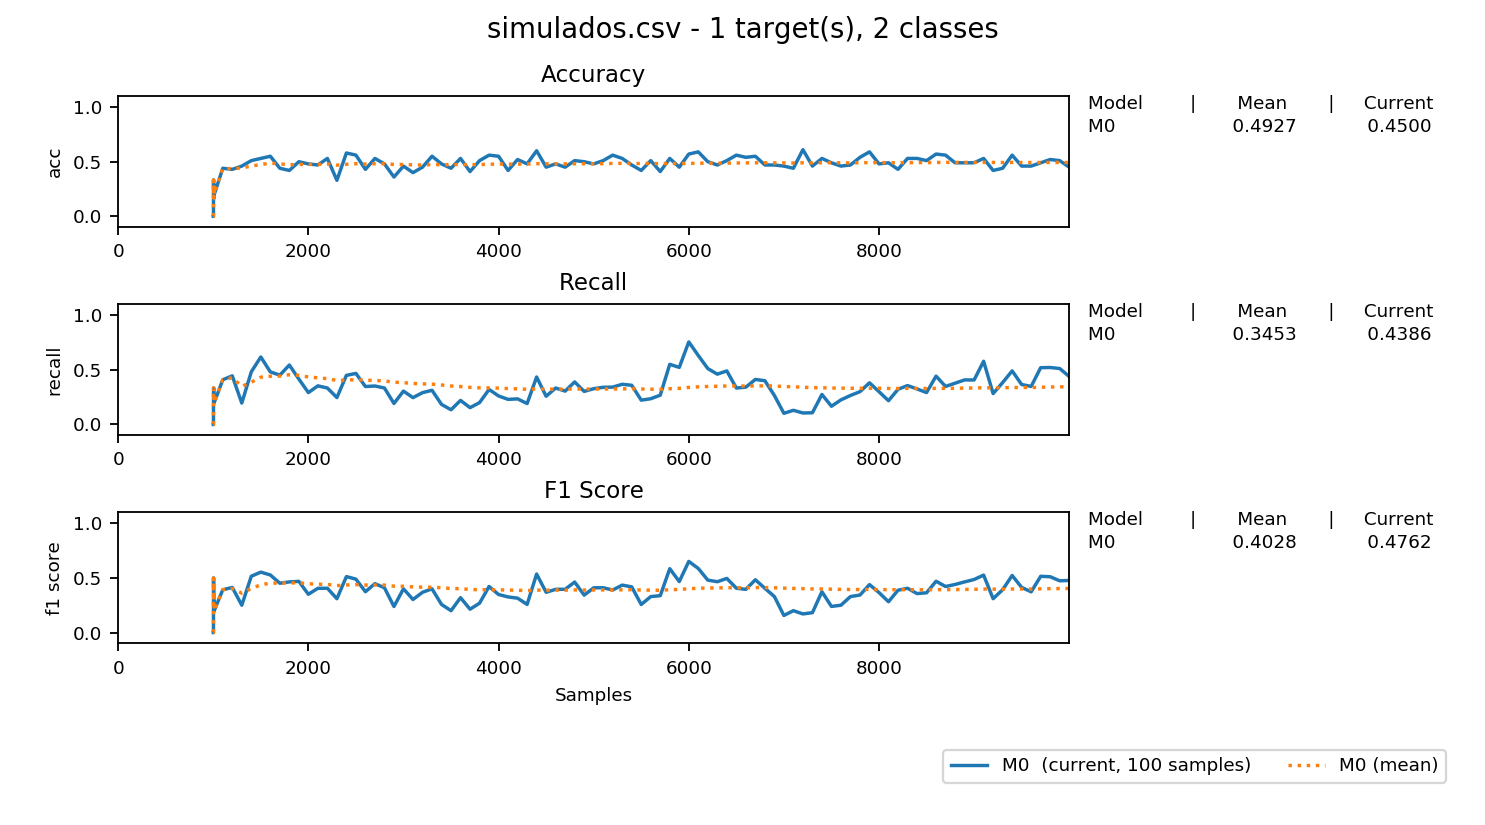

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1000 sample(s).
Evaluating...
 #################### [100%] [1726.67s]
Processed samples: 10000
Mean performance:
M0 - Accuracy     : 0.4927
M0 - Recall: 0.3453
M0 - F1 score: 0.4028


[OnlineBoosting(base_estimator=NaiveBayes(nominal_attributes=None),
                drift_detection=True, n_estimators=None, random_state=None)]

In [47]:
# 3. Configurar  evaluador
evaluator = EvaluatePrequential(show_plot=True,
                                pretrain_size=1000,n_wait = 100,
                                max_samples=10000, metrics=['accuracy','recall','f1'])
# 4. Run evaluation
evaluator.evaluate(stream=stream, model=clf2)

## Bagging Batch

In [5]:
df_stream = pd.read_csv('C:/Users/yerko/Anaconda3/pkgs/scikit-multiflow-0.4.1-py37h79cbd7a_1/Lib/site-packages/skmultiflow/data/datasets/simulados.csv')


In [6]:
df_stream['Y'].value_counts()

0    7596
1    7404
Name: Y, dtype: int64

In [7]:
df_stream.head()

,X1,X2,X3,X4,Y
0,640,47,158,11,1
1,425,43,156,9,1
2,227,57,169,17,0
3,556,53,195,2,0
4,542,86,147,4,0


In [8]:
df_stream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      15000 non-null  int64
 1   X2      15000 non-null  int64
 2   X3      15000 non-null  int64
 3   X4      15000 non-null  int64
 4   Y       15000 non-null  int64
dtypes: int64(5)
memory usage: 586.1 KB


In [9]:
import numpy as np
X = np.array(df_stream.drop(['Y'],1))
X


array([[640,  47, 158,  11],
       [425,  43, 156,   9],
       [227,  57, 169,  17],
       ...,
       [731,  91, 134,   5],
       [564,  93, 154,  15],
       [346,  42, 145,   4]], dtype=int64)

In [10]:
y = np.array(df_stream['Y'])

In [11]:

df_stream['Y'].value_counts()

0    7596
1    7404
Name: Y, dtype: int64

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [13]:
#Separar datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3,
random_state = 63)

# Weak Learners:

In [16]:
#################### Logistica Simple #############
from sklearn import feature_selection
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
model.score(X_test,y_test)


0.49444444444444446

In [20]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, predictions, average='weighted')

(0.49496974882890876, 0.49444444444444446, 0.38378386518793733, None)

In [21]:
f1_score(y_test, predictions, zero_division=1)

0.128686327077748

In [59]:
from time import time
tiempo_inicial = time() 
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
model.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

0.03906869888305664

In [22]:
################## Arbol ###############

from sklearn import tree
model_arbol = tree.DecisionTreeClassifier()
model_arbol.fit(X_train,y_train)
predictions = model_arbol.predict(X_test)
model_arbol.score(X_test,y_test)

0.49755555555555553

In [25]:
precision_recall_fscore_support(y_test, predictions, average='weighted')

(0.497720918123367, 0.49755555555555553, 0.4974925046915691, None)

#### from time import time
from sklearn.metrics import f1_score
tiempo_inicial = time() 
model_arbol = tree.DecisionTreeClassifier()
model_arbol.fit(X_train,y_train)
predictions = model_arbol.predict(X_test)
model_arbol.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

In [26]:
################# Naive Bayes Classifier ##############
from sklearn.naive_bayes import GaussianNB

model_nbayes = GaussianNB()
model_nbayes.fit(X_train, y_train)
predictions = model_nbayes.predict(X_test)
model_nbayes.score(X_test,y_test)
nb_prediction_proba = model_nbayes.predict_proba(X_test)[:, 1]
model_nbayes.score(X_test,y_test)


0.5035555555555555

In [29]:
precision_recall_fscore_support(y_test, predictions, average='weighted')

(0.5125683279023704, 0.5035555555555555, 0.4408081761871094, None)

In [63]:
from time import time
tiempo_inicial = time() 
model_nbayes = GaussianNB()
model_nbayes.fit(X_train, y_train)
predictions = model_nbayes.predict(X_test)
model_nbayes.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

0.016298532485961914

In [31]:
############ Perceptron ###########
from sklearn.metrics import f1_score
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

percep = Perceptron(tol=1e-3, random_state=0)
percep.fit(X_train,y_train)
predictions = percep.predict(X_test)
percep.score(X_test,y_test)
rf_prediction_proba = percep.predict(X_test)
#percep.f1_score(X_test,y_test)

In [32]:
precision_recall_fscore_support(y_test, predictions, average='weighted')

(0.25491279012345686, 0.5048888888888889, 0.3387795497801405, None)

In [66]:
from time import time
tiempo_inicial = time() 
percep = Perceptron(tol=1e-3, random_state=0)
percep.fit(X_train,y_train)
predictions = percep.predict(X_test)
percep.score(X_test,y_test)
rf_prediction_proba = percep.predict(X_test)
percep.score(X_test,y_test)
tiempo_final = time() 

tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

0.01787734031677246

In [67]:
### Bagging Naives Bayes
from time import time
tiempo_inicial = time() 
model_bag3 = BaggingClassifier(model_nbayes, 
                  n_estimators=100, 
                  bootstrap = True, random_state = 1)
model_bag3.fit(X_train,y_train)

predictions = model_bag3.predict(X_test)
model_bag3.score(X_test,y_test)
tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion


0.977888822555542

In [68]:
### Bagging Naives Bayes

model_bag3 = BaggingClassifier(model_nbayes, 
                  n_estimators=100, 
                  bootstrap = True, random_state = 1)
model_bag3.fit(X_train,y_train)

predictions = model_bag3.predict(X_test)
model_bag3.score(X_test,y_test)


0.506

In [69]:
from time import time
import numpy as np
tiempo_inicial = time() 
X = np.array(df_stream.drop(['Y'],1))
y = np.array(df_stream['Y'])
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification


#Separar datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3,
random_state = 63)
from sklearn.naive_bayes import GaussianNB
model_nbayes = GaussianNB()
model_bag3 = BaggingClassifier(model_nbayes, 
                  n_estimators=10, 
                  bootstrap = True, random_state = 1)
model_bag3.fit(X_train,y_train)

predictions = model_bag3.predict(X_test)
model_bag3.score(X_test,y_test)


from time import time

tiempo_final = time() 
 
tiempo_ejecucion = tiempo_final - tiempo_inicial
tiempo_ejecucion

0.09290862083435059

# Prueba Complejidad:

In [96]:
import numpy as np
import pandas as pd
import time
from sklearn.linear_model import LinearRegression
import math


class ComplexityEvaluator:

    def __init__(self, nrow_samples, ncol_samples):
        self._nrow_samples = nrow_samples
        self._ncol_samples = ncol_samples

    def _time_samples(self, model, random_data_generator):
        rows_list = []
        for nrow in self._nrow_samples:
            for ncol in self._ncol_samples:
                train, labels = random_data_generator(nrow, ncol)

                start_time = time.time()
                model.fit(train, labels)
                elapsed_time = time.time() - start_time

                result = {"N": nrow, "P": ncol, "Time": elapsed_time}
                rows_list.append(result)

        return rows_list

    def Run(self, model, random_data_generator):
        data = pd.DataFrame(self._time_samples(model, random_data_generator))
        print(data)
        data = data.applymap(math.log)
        linear_model = LinearRegression(fit_intercept=True)
        linear_model.fit(data[["N", "P"]], data[["Time"]])
        return linear_model.coef_
    


In [87]:
if __name__ == "__main__":
    class TestModel:

        def __init__(self):
            pass

        def fit(self, x, y):
            time.sleep(x.shape[0] / 1000.)

    def random_data_generator(n, p):
        return np.random.rand(n, p), np.random.rand(n, 1)

    model = TestModel()

    complexity_evaluator = ComplexityEvaluator(
            [200, 500, 1000, 2000, 3000], [1,5,10])

    res = complexity_evaluator.Run(model, random_data_generator)

    print(res)

       N   P      Time
0    200   1  0.202444
1    200   5  0.200879
2    200  10  0.208734
3    500   1  0.506740
4    500   5  0.504561
5    500  10  0.508349
6   1000   1  1.006688
7   1000   5  1.005504
8   1000  10  1.003276
9   2000   1  2.000983
10  2000   5  2.000017
11  2000  10  2.012180
12  3000   1  3.001244
13  3000   5  3.000882
14  3000  10  3.005757
[[0.99274327 0.00237724]]


In [107]:
import numpy as np
#import ComplexityEvaluator
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.linear_model import Perceptron


def random_data_regression(n, p):
    return np.random.rand(n, p), np.random.rand(n)


def random_data_classification(n, p):
    return np.random.rand(n, p), np.random.binomial(1, 0.5, n)


regression_models = [RandomForestRegressor(),
                     ExtraTreesRegressor(),
                     AdaBoostRegressor(),
                     SVR()]

classification_models = [GaussianNB(),
                         tree.DecisionTreeClassifier(),
                         LogisticRegression(),
                         Perceptron(tol=1e-3, random_state=0)
                         ]

names = ["GaussianNB",
         "tree",
         "LogisticRegression",
        "Perceptron"]


complexity_evaluator = ComplexityEvaluator(
    [500, 1000, 2000, 5000, 10000, 15000, 20000],
    [5, 10, 20, 50, 100, 200])

i = 0
for model in regression_models:
    res = complexity_evaluator.Run(model, random_data_regression)[0]
    print(names[i] + ' | ' + str(round(res[0], 2)) +
          ' | ' + str(round(res[1], 2)))
    i = i + 1

for model in classification_models:
    res = complexity_evaluator.Run(model, random_data_classification)[0]
    print(names[i] + ' | ' + str(round(res[0], 2)) +
          ' | ' + str(round(res[1], 2)))
    i = i + 1    
 

 
    

        N    P        Time
0     500    5    0.556823
1     500   10    0.897720
2     500   20    1.245100
3     500   50    2.497283
4     500  100    4.548734
5     500  200    8.986496
6    1000    5    1.096691
7    1000   10    1.536066
8    1000   20    2.825849
9    1000   50    6.110932
10   1000  100   10.969531
11   1000  200   21.922166
12   2000    5    2.430645
13   2000   10    3.459167
14   2000   20    6.788113
15   2000   50   15.098541
16   2000  100   26.769798
17   2000  200   52.955509
18   5000    5    6.696911
19   5000   10   11.569482
20   5000   20   19.408816
21   5000   50   51.512980
22   5000  100   91.985380
23   5000  200  178.455503
24  10000    5   17.357653
25  10000   10   30.368928
26  10000   20   51.661580
27  10000   50  120.953483
28  10000  100  220.280836
29  10000  200  453.776763
30  15000    5   29.104316
31  15000   10   47.702061
32  15000   20   89.491348
33  15000   50  204.756304
34  15000  100  377.727182
35  15000  200  727.986226
3

ValueError: math domain error